# EDA BÁSICO - INFORMACIÓN GEOGRÁFICA DE PAÍSES

Este es un ejemplo de EDA básico en el que se analiza información contenida en un Dataset de GitHub relativo a información sobre países del mundo

In [6]:
import numpy as np

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

url = 'https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv'
df = pd.read_csv(url, sep=";")
print(df.head(5))

  alpha_2 alpha_3      area           capital continent currency_code  \
0      AD     AND     468.0  Andorra la Vella        EU           EUR   
1      AE     ARE   82880.0         Abu Dhabi        AS           AED   
2      AF     AFG  647500.0             Kabul        AS           AFN   
3      AG     ATG     443.0        St. John's       NaN           XCD   
4      AI     AIA     102.0        The Valley       NaN           XCD   

  currency_name eqivalent_fips_code fips  geoname_id          languages  \
0          Euro                 NaN   AN     3041565                 ca   
1        Dirham                 NaN   AE      290557  ar-AE,fa,en,hi,ur   
2       Afghani                 NaN   AF     1149361  fa-AF,ps,uz-AF,tk   
3        Dollar                 NaN   AC     3576396              en-AG   
4        Dollar                 NaN   AV     3573511              en-AI   

                   name         neighbours  numeric   phone  population  \
0               Andorra            

Comprobación de la información básica que nos ofrece la librería PANDAS:

In [2]:
print('Cantidad de filas y columnas del dataset: ', df.shape)
print('Nombres de las columnas: ', df.columns)

Cantidad de filas y columnas del dataset:  (252, 19)
Nombres de las columnas:  Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')


Información general

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

Podemos comprobar que el dataset dispone de 252 registros/filas y 19 columnas/campos. Se observa también la cantidad de registros(filas) que no tienen valores nulos y los campos(columnas) en los que esta información reside. También es posible comprobar el tipo de dato de cada uno de los campos/columnas.  

Para obtener una información de carácter más estadístico, ejecutamos lo siguiente:

In [4]:
df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


En esta ocasión, obtenemos información relativa a componentes estadísticas que nos pueden ser de utilidad en los pasos siguientes: cantidad, media, desviación estándard, mínimo, máximo y cuartiles

In [32]:
print(pd.__version__) # averiguar versión de Pandas.

2.1.1


Podemos comprobar la correlación de datos de forma totalmente gráfica usando una matriz de correlación.

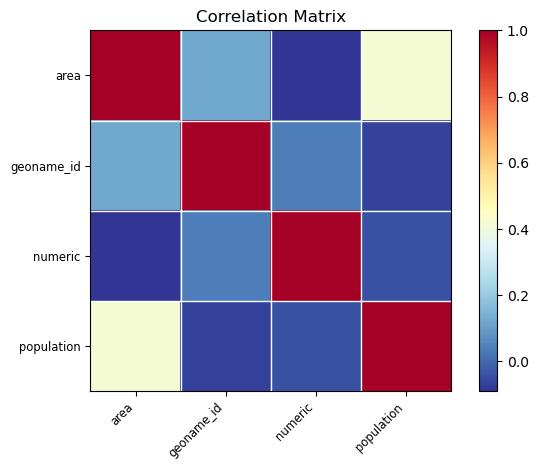

In [33]:
corr = df[['area','geoname_id','numeric','population']].corr() # Según la versión de Pandas, será necesario especificar las columnas a plotear
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

En este caso vemos baja correlación entre las variables. Dependiendo del algoritmo que utilicemos podría ser una buena decisión eliminar features que tuvieran alta correlación


En el siguiente paso procedemos a cargar un segundo archivo csv para revisar el crecimiento de la población en años más recientes. Seguidamente, filtramos los datos de nuestro país y visualizamos.

       country  year  population
0  Afghanistan  1952     8425333
1  Afghanistan  1957     9240934
2  Afghanistan  1962    10267083
3  Afghanistan  1967    11537966
4  Afghanistan  1972    13079460
     country  year  population
1416   Spain  1952    28549870
1417   Spain  1957    29841614
1418   Spain  1962    31158061
1419   Spain  1967    32850275
1420   Spain  1972    34513161


<Axes: >

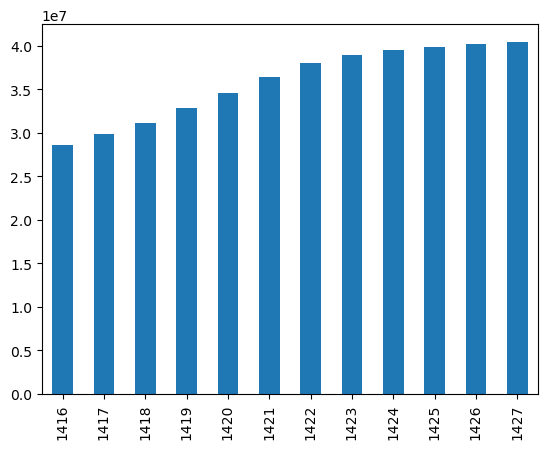

In [34]:
url = 'https://raw.githubusercontent.com/DrueStaples/Population_Growth/master/countries.csv'
df_pop = pd.read_csv(url)
print(df_pop.head(5))
df_pop_es = df_pop[df_pop["country"] == 'Spain' ]
print(df_pop_es.head())
df_pop_es.drop(['country'],axis=1)['population'].plot(kind='bar')

Al no tener establecido el eje X nos aparece el id de fila.

Procedemos a establecer una comparativa con otro país, por ejemplo, Argentina

<Axes: >

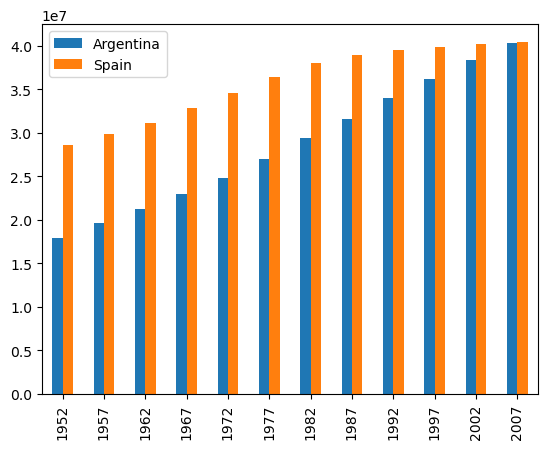

In [36]:
df_pop_ar = df_pop[(df_pop["country"] == 'Argentina')]

anios = df_pop_es['year'].unique()
pop_ar = df_pop_ar['population'].values
pop_es = df_pop_es['population'].values

df_plot = pd.DataFrame({'Argentina': pop_ar,
                        'Spain': pop_es},
                       index=anios)
df_plot.plot(kind='bar')

Hemos obtenido una gráfica comparativa de crecimiento poblacional entre los dos paises, del 1952 al 2007.  

Seguidamente realizamos un filtrado de paises hispano hablantes.

In [37]:
df_espanol = df.replace(np.nan, '', regex=True)
df_espanol = df_espanol[ df_espanol['languages'].str.contains('es') ]
df_espanol

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
13,AW,ABW,193.0,Oranjestad,,AWG,Guilder,,AA,3577279,"nl-AW,es,en",Aruba,,533,297,71566,,,.aw
28,BO,BOL,1098580.0,Sucre,SA,BOB,Boliviano,,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,,,.bo
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,#####-###,^\d{5}-\d{3}$,.br
36,BZ,BLZ,22966.0,Belmopan,,BZD,Dollar,,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,,,.bz
45,CL,CHL,756950.0,Santiago,SA,CLP,Peso,,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,#######,^(\d{7})$,.cl
48,CO,COL,1138910.0,Bogota,SA,COP,Peso,,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,,,.co
49,CR,CRI,51100.0,San Jose,,CRC,Colon,,CS,3624060,"es-CR,en",Costa Rica,"PA,NI",188,506,4516220,####,^(\d{4})$,.cr
50,CU,CUB,110860.0,Havana,,CUP,Peso,,CU,3562981,es-CU,Cuba,US,192,53,11423000,CP #####,^(?:CP)*(\d{5})$,.cu
60,DO,DOM,48730.0,Santo Domingo,,DOP,Peso,,DR,3508796,es-DO,Dominican Republic,HT,214,+1-809 and 1-829,9823821,#####,^(\d{5})$,.do


<Axes: xlabel='alpha_3'>

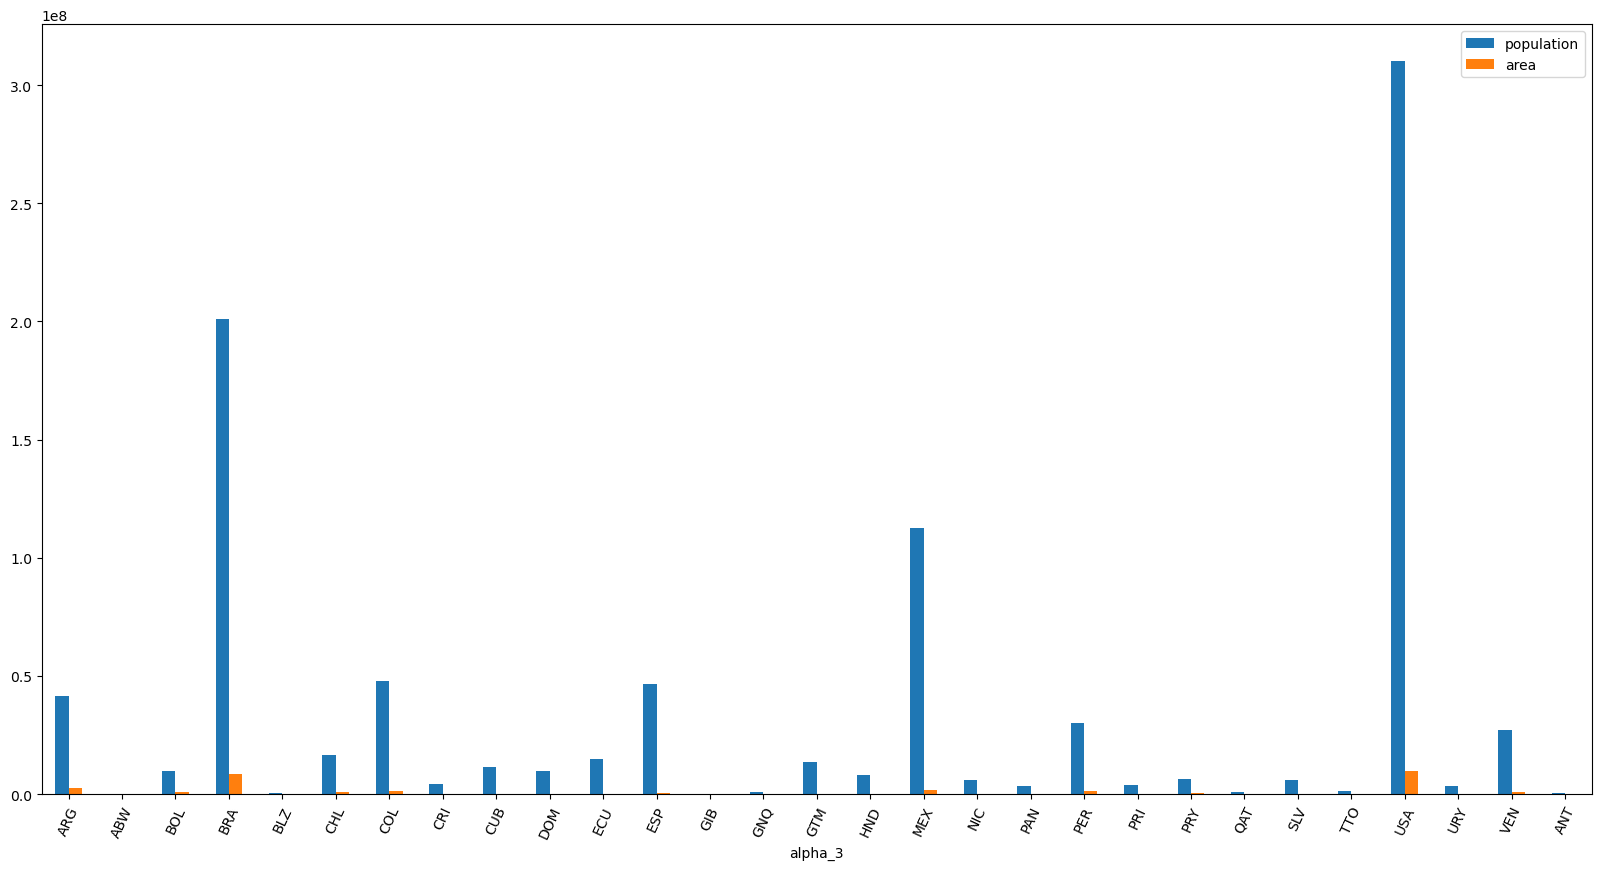

In [38]:
# VISUALIZACIÓN
df_espanol.set_index('alpha_3')[['population','area']].plot(kind='bar',rot=65,figsize=(20,10))

## DETECCIÓN DE OUTLIERS

Para poder llevar a cabo este proceso, definimos como límites superior e inferior la media aproximada correspondiente a 2 veces la desviación estándard (std), tomada a menudo como máximos de tolerancia.

In [39]:
anomalies = []

# Función ejemplo para detección de outliers
def find_anomalies(data):
    # Set upper and lower limit to 2 standard deviation
    data_std = data.std()
    data_mean = data.mean()
    anomaly_cut_off = data_std * 2
    lower_limit  = data_mean - anomaly_cut_off
    upper_limit = data_mean + anomaly_cut_off
    print(lower_limit.iloc[0])
    print(upper_limit.iloc[0])

    # Generate outliers
    for index, row in data.iterrows():
        outlier = row # # obtener primer columna
        # print(outlier)
        if (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] < lower_limit.iloc[0]):
            anomalies.append(index)
    return anomalies

find_anomalies(df_espanol.set_index('alpha_3')[['population']])

-102872707.87855022
167589161.25786057


['BRA', 'USA']

Detectamos como outliers a Brasil y a USA.  
Los eliminamos y realizamos unas gráficas, ordenando por población de menor a mayor.

<Axes: xlabel='alpha_3'>

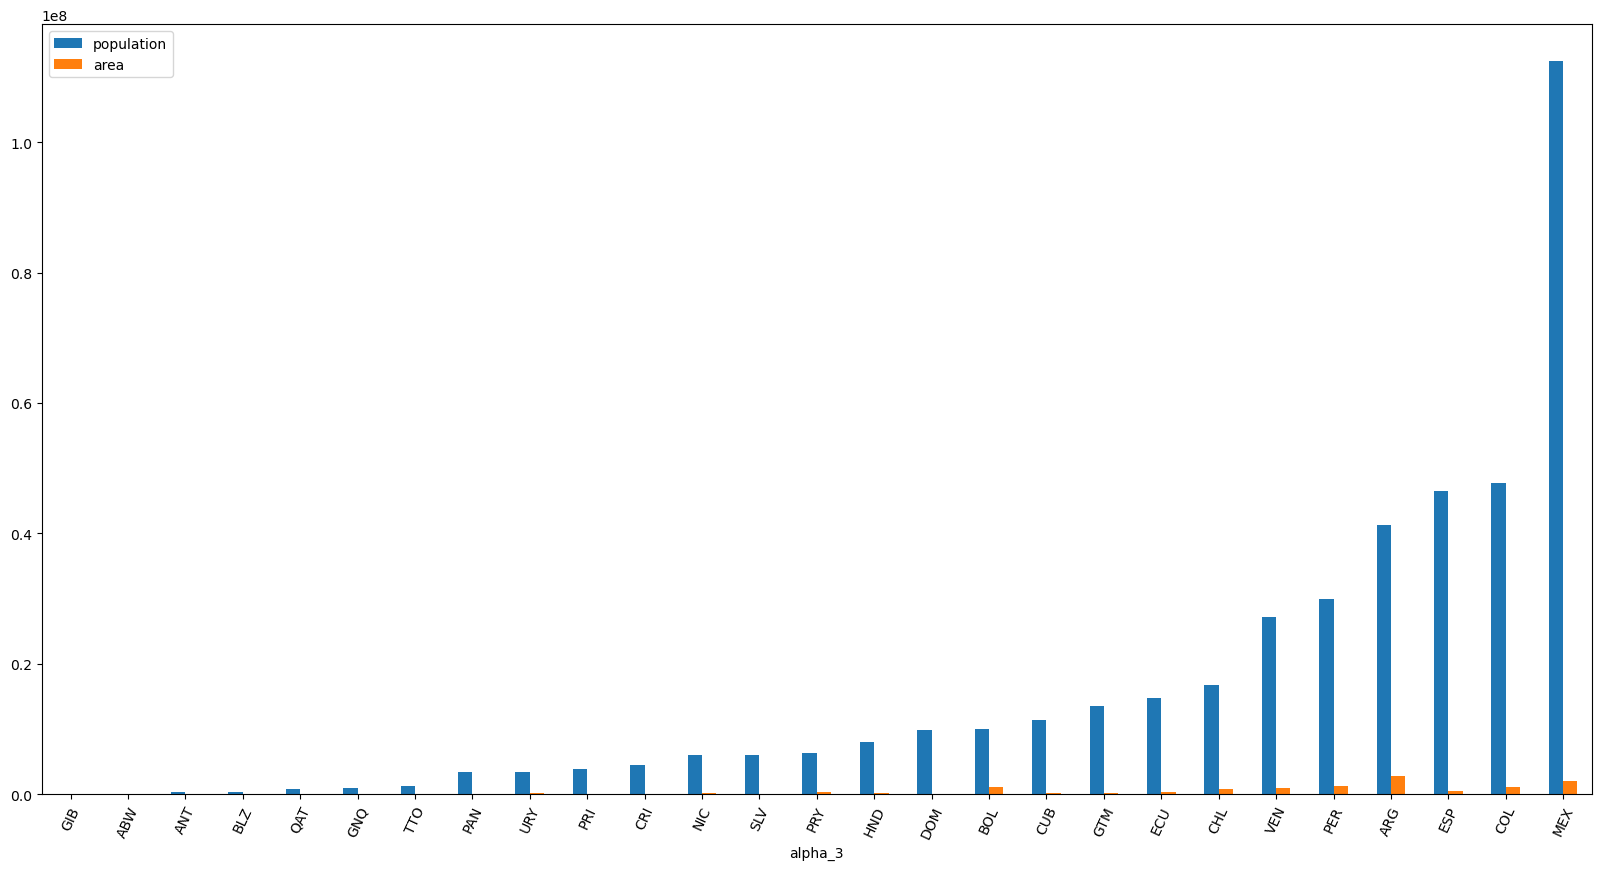

In [40]:
# Quitamos BRA y USA por ser outliers y volvemos a generar gráficas
df_espanol.drop([30,233], inplace=True)
df_espanol.set_index('alpha_3')[['population','area']].sort_values(["population"]).plot(kind='bar',rot=65,figsize=(20,10))

Obtenemos la gráfica organizada y sin 'outliers', ofreciendo una comparativa más legible.

## CONCLUSIONES

En este ejercicio se ha visto un recorrido sobre qué es y cómo lograr hacer un Análisis Exploratorio de Datos básico. Su importancia es ofrecer una visión rápida sobre la calidad de datos que tenemos, información que puede llegar a establecer o determinar la continuidad o no de un proyecto.

Va a depender de los datos que vayamos a explorar, en cantidad y calidad. Evidentemente jamás se debe de perder de vista cuál es nuestro OBJETIVO, es decir, aquello que intentamos conseguir, que será siempre lo que nos guiará en nuestro análisis.

A partir de aquí, el siguiente paso sería una etapa en la que ya se preprocesarán los datos con la idea de que se transformen en la entrada a un modelo (ó modelos!) de Machine Learning, por ejemplo.